In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor

In [3]:
train = pd.read_csv('C:\\Users\\PRIYANSH\\Desktop\\projects\\Big_mart_2\\Train.csv')
print(train.shape)
train.head(3)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [5]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [6]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [10]:
#train.describe(include='all')   # consider all data type
train.describe()   #consider only floating datatype

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


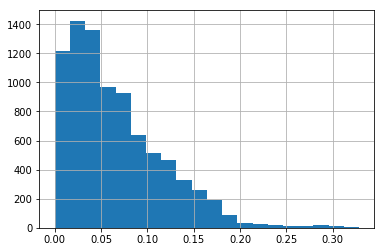

In [14]:
import matplotlib.pyplot as plt
train['Item_Visibility'].hist(bins=20)

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [16]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c

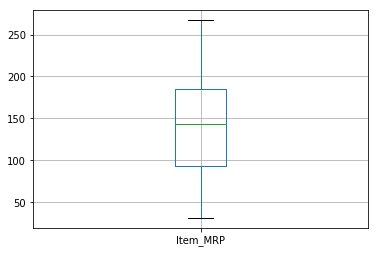

In [20]:
'''
min        31.290000  --->begin
25%        93.826500  --->first quartile 
50%       143.012800  ----> second quartile
75%       185.643700  ----> third quartile
max       266.888400  ---->fourth quartile (top)
'''
train.boxplot(column='Item_MRP') 

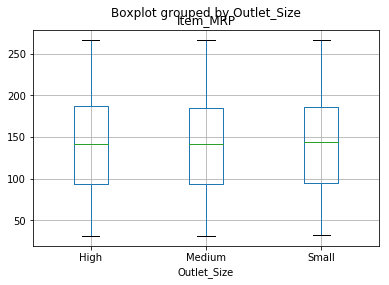

In [23]:
# what is the MRP rate of items in various outlets such as small outlet , medium outlet , high outlet
train.boxplot(column='Item_MRP', by='Outlet_Size')

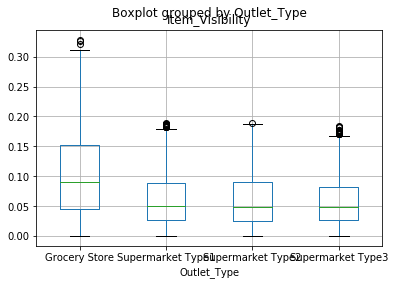

In [28]:
#How many item are visible  or  how much (capacity) they are visible  in several outlets such as grocery shop , supermarket etc.
train.boxplot(column='Item_Visibility', by='Outlet_Type')

In [33]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [35]:
print(train['Outlet_Size'].mode()[0] )

train['Outlet_Size'].mode()

Medium


0    Medium
dtype: object

In [36]:
# fill the na for outlet size with 'medium'
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [37]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
# fill the na for item weight with the mean of 'weights'
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [39]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

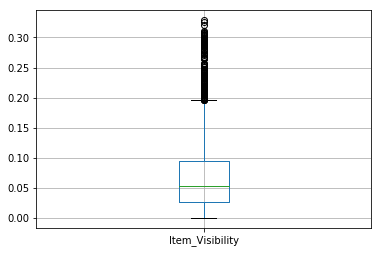

In [40]:
train.boxplot(column='Item_Visibility')

In [48]:
# delete the observations

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)

Q1 , Q3

(0.026989477499999998, 0.0945852925)

In [49]:
IQR = Q3 - Q1

#remove outliers
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [51]:
print(filt_train.shape)
filt_train.head()   # previous size of dataset 8523 but now 8379 (so outliers have been removed / deleted from the dataset )

(8379, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
filt_train.shape, train.shape

((8379, 12), (8523, 12))

In [53]:
train = filt_train    # changes have been made permanantely
train.shape

(8379, 12)

In [54]:
# make bins or ranges , such as  0.000 to 0.065 , 0.065 to 0.13, 0.13 to 0.2

train['Item_Visibility_bins'] = pd.cut( train['Item_Visibility'],
                                        [0.000, 0.065, 0.13, 0.2],  labels=['Low Viz', 'Viz', 'High Viz'])

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


In [60]:
# replace Null value with 'low-viz'
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.NaN, 'Low Viz')

In [63]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Viz


In [64]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [65]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

# Choosing the Fat content, item vizibility bins, outlet size, loc type and type for LABEL ENCODER

In [66]:
le = LabelEncoder()

In [67]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [68]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [69]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [70]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [71]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

 # create dummies for outlet type

In [78]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [72]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [73]:
train = pd.concat([train, dummy], axis=1)

 # in linear regression that correlated features should not be present


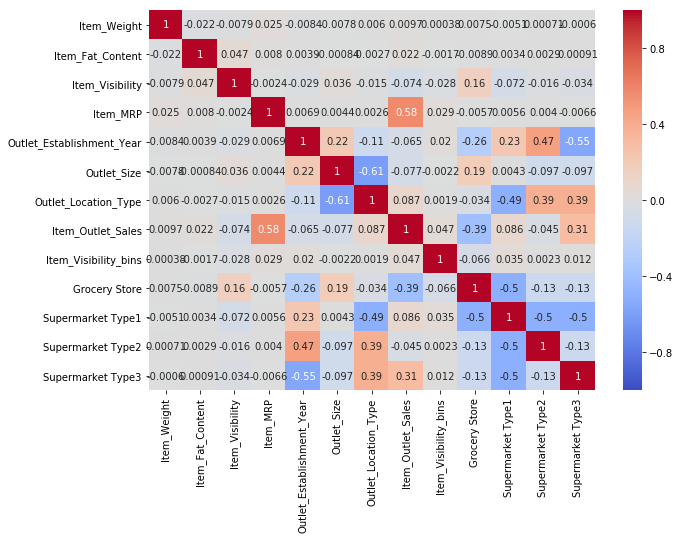

In [76]:
# Design or create a heatmap matrix to analyse about the correalation between 

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),
            vmin=-1, 
            cmap='coolwarm',    #color spectrum
            annot=True);

In [74]:
# Accpet the relation between eacn and every features based on some ondition
# the value should  be !=1 , < -0.85 and  > 0.85

train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility_bins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

#  drop all the object types features 

In [79]:

train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

# build the linear regression model

In [80]:
# split the dataset into two parts into predictors(features) and target(dependent variables)
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

# Now import Test_Dataset

In [81]:
test = pd.read_csv('C:\\Users\\PRIYANSH\\Desktop\\projects\\Big_mart_2\\Test.csv')
print(test.shape)
test.head()

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [82]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [83]:
#Since we have already evaluated the missing value for 'Outlet_size' in training set as 'medium'
# apply that value here on test-dataset
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [84]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [85]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [86]:
# Categories (3, object): [Low Viz < Viz < High Viz]
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace(np.NaN, 'Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [Low Viz < Viz < High Viz]

In [87]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [88]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [89]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [90]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [92]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [93]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [94]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [95]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

# Apply linear regression 

In [96]:
lin = LinearRegression()

In [97]:
lin.fit(X, y)
predictions = lin.predict(X_test)

In [105]:
predictions

array([1775.26779123, 1517.19470521, 1933.94531422, ..., 1949.2774693 ,
       3534.24058388, 1375.16026402])

# Apply decision tree classifier

In [100]:
dtree_class = DecisionTreeClassifier(criterion='gini', max_depth=25)
y = y.astype(int)
dtree_class.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
#check the performance of the model (on training dataset)
accuracy_score(y, dtree_class.predict(X))

0.9881847475832438

In [102]:
r2_score(y, dtree_class.predict(X))

0.9780966687571343

In [103]:
pred = dtree_class.predict(X_test)
pred

array([1693, 1230,  484, ..., 3115, 2830, 1651])

#  Apply decision tree geressor

In [106]:
dtree_reg = DecisionTreeRegressor(criterion='mse', max_depth=10)
dtree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [107]:
pred = dtree_reg.predict(X_test)
pred

array([1683.86774194, 1283.09466019,  597.94545455, ..., 1808.80246914,
       5011.77777778, 1283.09466019])

# cross_val_score  or Accuracy Score

In [108]:
cross_val_score(lin, X, y, cv=5, scoring='r2')  # accuracy of the training model

array([0.56695129, 0.54844669, 0.5434969 , 0.56014671, 0.55995928])

In [109]:
cross_val_score(dtree_reg, X, y, cv=5, scoring='r2')

array([0.52785724, 0.52583417, 0.4758321 , 0.50941632, 0.52871736])

In [ ]:
# cross_val_score(dtree_class, X, y, cv=5, scoring='roc_auc') - results in an error

# Evaluate the r2_score    
check performance of the model on training dataset

In [110]:
r2_score(y, lin.predict(X)) 

0.5577422609071079

In [111]:
r2_score(y, dtree_reg.predict(X))

0.6718952242298817

# Average of all the predictions

In [112]:
avg_pred = (lin.predict(X) + dtree_reg.predict(X)) / 2

In [113]:
r2_score(y, avg_pred)

0.6437695983677753

In [114]:
wavg_pred = lin.predict(X)*0.1 + dtree_reg.predict(X)*0.9

In [115]:
r2_score(y, wavg_pred)

0.6709022359853452

# Apply Random forest Regressor

In [119]:
rmf = RandomForestRegressor(n_estimators=100, max_depth=10)
rmf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
r2_score(y, rmf.predict(X))

0.6990061269281135

In [122]:
# accuracy_score is used for classification model